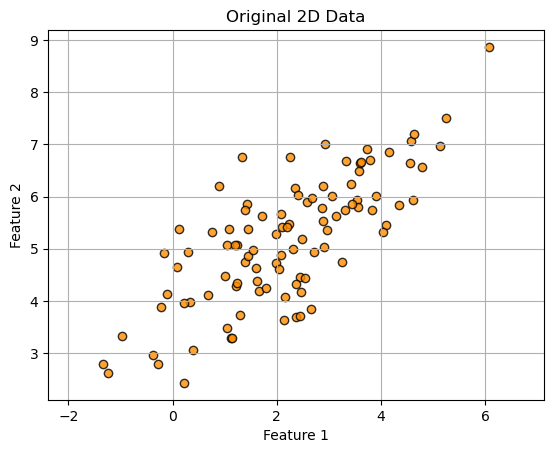

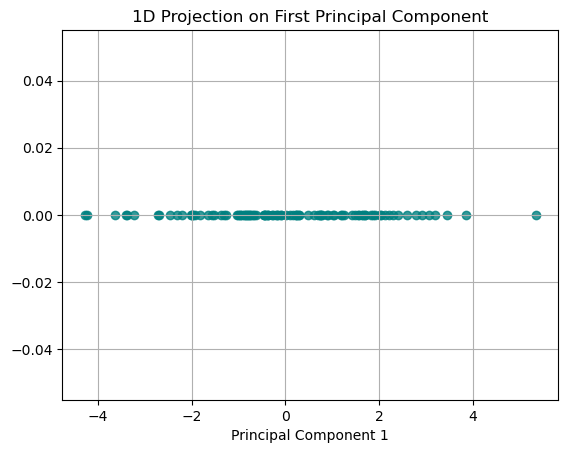

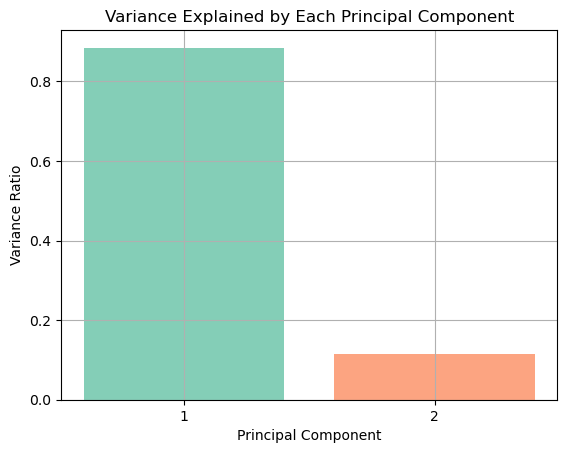

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate data
np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)

# Step 2: Original 2D plot with a vibrant colormap
plt.scatter(X[:, 0], X[:, 1], c='darkorange', edgecolors='black', alpha=0.8)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()

# Step 3: Center data
X_centered = X - np.mean(X, axis=0)

# Step 4: Covariance matrix
cov_matrix = np.cov(X_centered.T)

# Step 5: Eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

# Step 6: Project onto first PC
pc1 = eig_vecs[:, 0]
X_projected = X_centered @ pc1.reshape(-1, 1)

# Step 7: 1D projection with teal markers
plt.scatter(X_projected, np.zeros_like(X_projected), c='teal', alpha=0.8)
plt.title("1D Projection on First Principal Component")
plt.xlabel("Principal Component 1")
plt.grid(True)
plt.show()

# Step 8: Variance explained with soft pastel bars
colors = ['#66c2a5', '#fc8d62']
plt.bar(range(1, len(eig_vals)+1), eig_vals / np.sum(eig_vals), color=colors, alpha=0.8)
plt.title("Variance Explained by Each Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.xticks([1, 2])
plt.grid(True)
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18260\2485547796.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', 10)


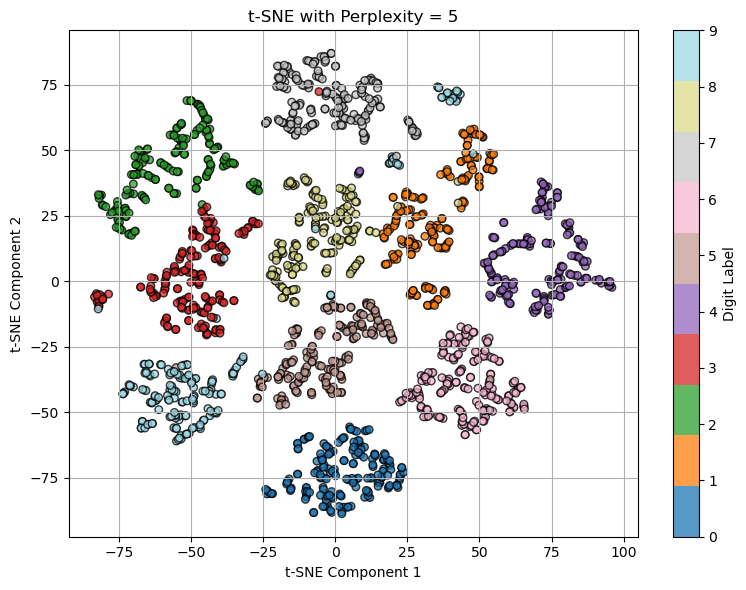

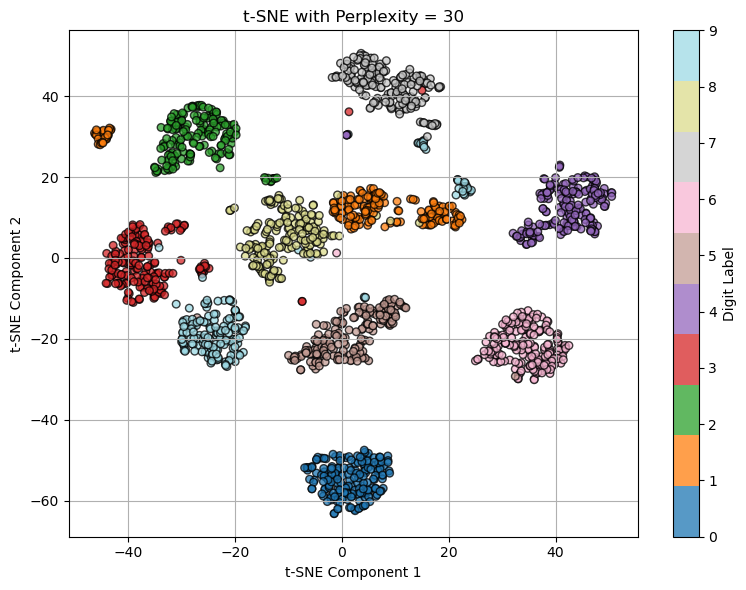

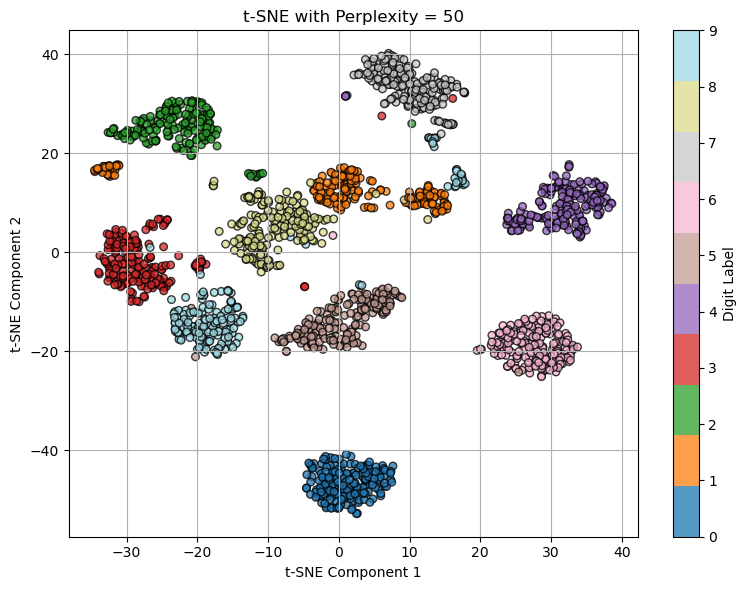

In [7]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
y = digits.target

# Use tab20 or other color map
cmap = plt.cm.get_cmap('tab20', 10)

for perplexity in [5, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_embedded = tsne.fit_transform(X)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(
        X_embedded[:, 0], X_embedded[:, 1], 
        c=y, cmap=cmap, edgecolors='black', s=30, alpha=0.75
    )
    plt.title(f"t-SNE with Perplexity = {perplexity}")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.grid(True)
    plt.colorbar(scatter, label="Digit Label")
    plt.tight_layout()
    plt.show()
